In [ ]:
# Librerías para datos
import pandas as pd
import numpy as np

# Librerías de imputación
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [41]:
df_mer= pd.read_csv("merchant_fill_nonulls.csv")
df_mer.sample(5)

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
889,889,Shorts de sport de mode pour femmes Gym Workou...,5.66,5,100,Si,3.41,27,No,Buena,No,"Summer,Beach Shorts,Yoga,Waist,Elastic,Fitness...",black,XXL,Livraison standard,1,No,48,50,CN,keidjur,80 % avis positifs,1129,5d51381f933fb16c06bb9d71,https://www.wish.com/c/5e4501ec336e3e324049e199,5e4501ec336e3e324049e199,1,100,100.0,3.833,1129.0,5.66,5.00,27.0,13.20,Regular,8.000000,4.000000,1.000000,6.000000,8.000000
1459,1459,2020 Summer Funny Pop Two Piece Set Summer Har...,12.00,11,50,No,4.24,17,No,Buena,No,"Summer,croptopandshortsset,Shorts,women crop t...",pink & black,XS.,Livraison standard,3,No,36,50,CN,puzhengxing,82 % avis positifs,2647,5abf82da22fad76f8c13b113,https://www.wish.com/c/5e951eb4c7783d0a9a876292,5e951eb4c7783d0a9a876292,1,50,50.0,3.840,2647.0,12.00,11.00,17.0,9.09,Regular,6.000000,0.000000,1.000000,1.000000,9.000000
917,917,Womens Summer Fashion Lip Print 2pc Set Ladies...,7.00,34,5000,No,3.81,192,No,Buena,No,"Summer,Shorts,Shirt,Sleeve,sportsset,short sle...",black,XS,Livraison standard,2,No,43,50,CN,makingsuper,85 % avis positifs,15348,57fde031235aaa1926afe803,https://www.wish.com/c/5eaa6872e868273dd4f538d2,5eaa6872e868273dd4f538d2,3,10100,3367.0,4.014,15348.0,6.67,27.33,306.0,-79.41,Buena,20.000000,29.000000,6.000000,33.000000,104.000000
305,305,S-5XL Été Nouvelle Mode Femmes Argent Lettre I...,11.00,59,1000,No,4.11,135,No,Buena,No,"Summer,Plus Size,letter print,Dress,short slee...",yellow,M,Livraison standard,2,No,41,50,CN,bighero,86 % avis positifs,6715,58c910072be00b51c601ccee,https://www.wish.com/c/5d93f4284385140973836ddf,5d93f4284385140973836ddf,2,2000,1000.0,4.057,6715.0,10.00,33.50,130.0,-81.36,Buena,24.000000,19.000000,10.000000,7.000000,75.000000
931,931,Femmes Robes D'été De Mode Col En V Dos Nu Rob...,12.00,11,100,Si,5.00,0,No,Buena,No,"Summer,Plus Size,partydressesforwomen,Lace,rob...",yellow,XS,Livraison standard,3,No,25,50,CN,ahighqlty,100 % avis positifs,6,5e70afae21861a90a4e6b7f0,https://www.wish.com/c/5f03643cc00703c46d6745f0,5f03643cc00703c46d6745f0,2,200,100.0,4.500,6.0,12.00,11.00,0.0,9.09,Buena,179.599476,134.549738,63.711387,95.735602,442.263743


In [ ]:
sns.histplot?

In [42]:
df_mer.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count'],
      dtype='object')

# ¿Cómo se distribuyen los precios de los productos?

Text(0, 0.5, 'Q Productos')

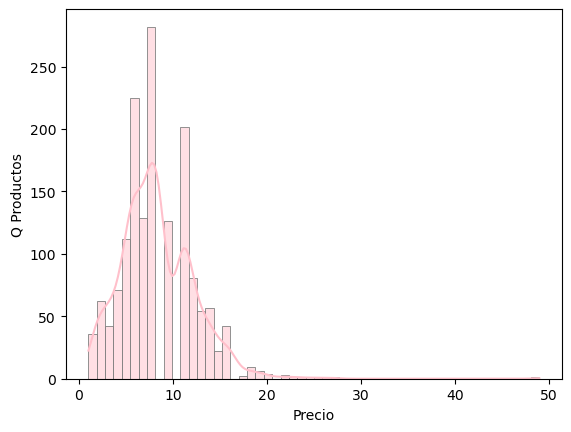

In [43]:
histo_precios= sns.histplot(x = "price", data = df_mer, kde= True, edgecolor= 'grey', color = "pink");
plt.xlabel("Precio")
plt.ylabel("Q Productos")

Interpretación= 
Los precios se distribuyen de la siguiente forma:
    - Encontramos un pico marcado de cantidad de productos a unos 8 euros. 
    - Otros dos precios a destacar que mas procutos tienen son 5-6 euros y 12-13 euros. 
    - A destacar que baja draticamente la cantidad de productos que superan los 20 euros.
    - existen precios que no existen en nimngun producto como 9 euros, 11 euros y 16 euros.
    - Vemos una mayor concentracion de precios hacia la izq y baja más rapidamente conforme se va encareciendo el producto. 

In [ ]:
sns.boxplot?

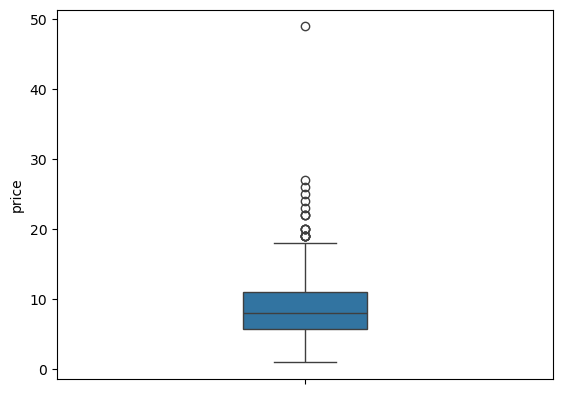

In [44]:
boxplot= sns.boxplot(y='price', width=0.25, data=df_mer)

Interpretacion: 
- Con el boxplot podemos darnos cuenta de que existen precios altos aislados que no se visualizaban tan bien en el histograma.
- Todos los valores que esten por encima de 18-19 euros son potenciales outliers o "datos atipicos" que nos podrian afectar a las estimaciones y tendriamos que tenerlos en cuenta. 

# ¿Cuál es la relación entre el precio y la calificación promedio de los productos?

In [45]:
df_mer['avg_rating']= (df_mer['rating_one_count']*1+df_mer['rating_two_count']*2+
                                                     df_mer['rating_three_count']*3+df_mer['rating_four_count']*4+
                                                     df_mer['rating_five_count']*5)/(df_mer['rating_one_count']+
                                                                                     df_mer['rating_two_count']+
                                                                                      df_mer['rating_three_count']+df_mer['rating_four_count']+
                                                                                      df_mer['rating_five_count'])

In [46]:
df_mer.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count',
       'avg_rating'],
      dtype='object')

In [47]:
df_mer['avg_rating'].head()

0    3.759259
1    3.451019
2    3.828283
3    3.765957
4    2.857143
Name: avg_rating, dtype: float64

In [48]:
df_mer['avg_rating'].describe()

count    1573.000000
mean        3.788823
std         0.474195
min         1.000000
25%         3.545455
50%         3.850277
75%         4.080090
max         5.000000
Name: avg_rating, dtype: float64

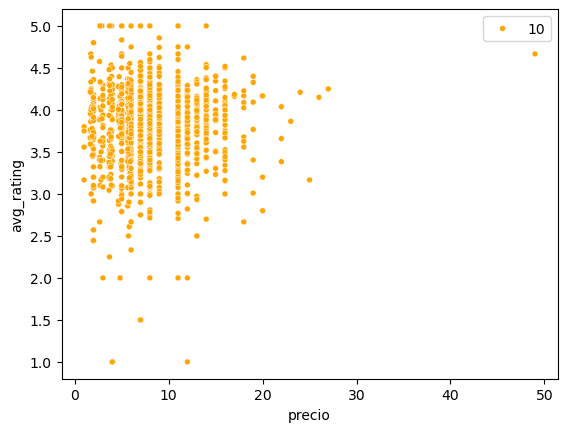

In [49]:
scatterplot= sns.scatterplot(x = "price", 
                y = "avg_rating", 
                data = df_mer, 
                size = 10, 
                marker= "o", 
                color = "orange")
plt.xlabel("precio")
plt.ylabel("avg_rating");

<Axes: xlabel='price', ylabel='avg_rating'>

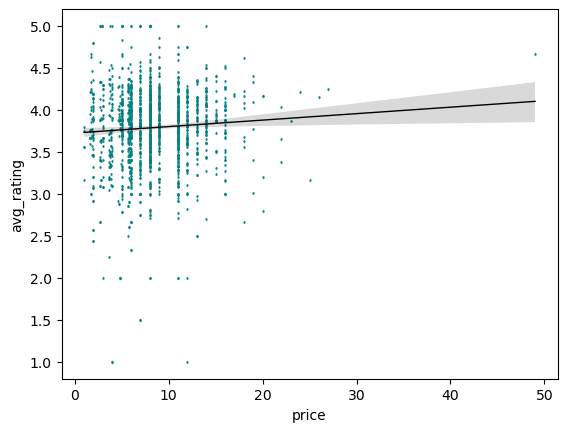

In [50]:
sns.regplot(x = "price", 
            y = "avg_rating", 
            data = df_mer, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

Interpretación=
- Tiene una cierta tendencia positiva pero no es reseñable.

# ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (uses_ad_boosts) o no?

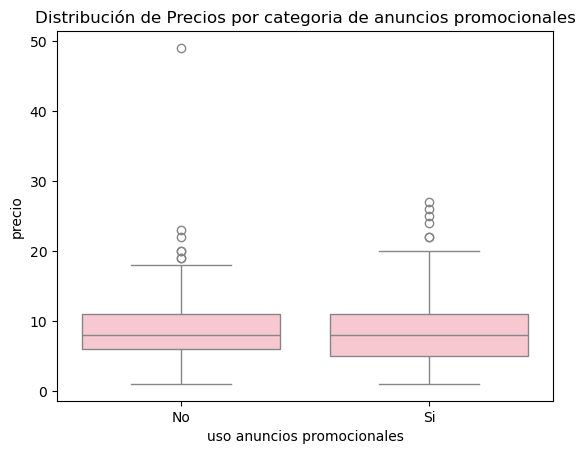

In [51]:
sns.boxplot(x= 'uses_ad_boosts', y='price', data=df_mer, color= 'pink')
plt.title('Distribución de Precios por categoria de anuncios promocionales')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

Interpretación=
- el 50% central de los precios de la categoria 'No' está mas concentrado que los de la categoria 'si'.
- Hay un comportamiento extraño en la categoria no, con un outlier muy alejado. 
- Tambien encontramos valores atipicos en la categoria si.
- El minimo de las dos categorias parece concentrarse en un precio similar, así como la mediana. 

# ¿Existe una relación entre el uso de anuncios y las unidades vendidas?

In [52]:
df_mer.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count',
       'avg_rating'],
      dtype='object')

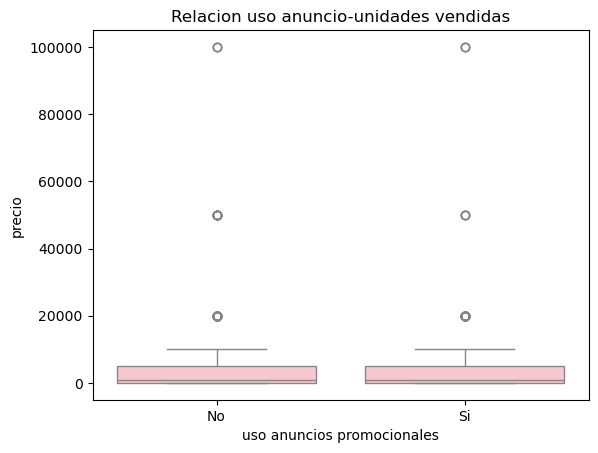

In [53]:
sns.boxplot(x= 'uses_ad_boosts', y='units_sold', data=df_mer, color= 'pink')
plt.title('Relacion uso anuncio-unidades vendidas')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

Interpretacion=
- Parecen tener ambas categorias el mismo comportamiento y no parece tener relacion ninguna.

<Axes: xlabel='units_sold', ylabel='price'>

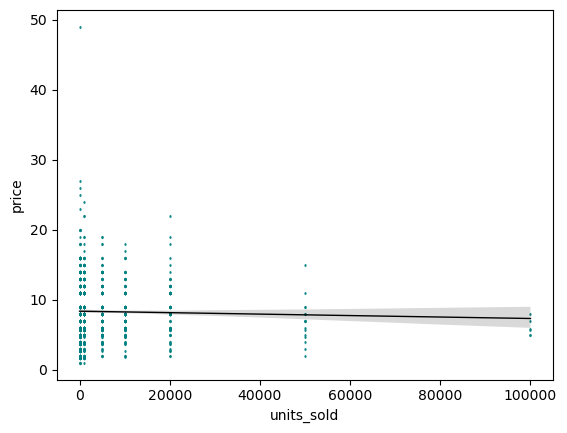

In [54]:
sns.regplot(x = "units_sold", 
            y = "price", 
            data = df_mer, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1})

# ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

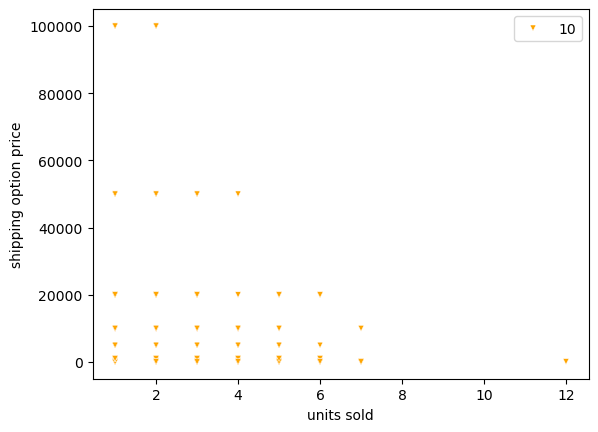

In [56]:
sns.scatterplot(y = "units_sold", 
                x = "shipping_option_price", 
                data = df_mer, 
                size = 10, 
                marker= "v", 
                color = "orange")


# cambiamos los nombres de los ejes
plt.xlabel("units sold")
plt.ylabel("shipping option price");

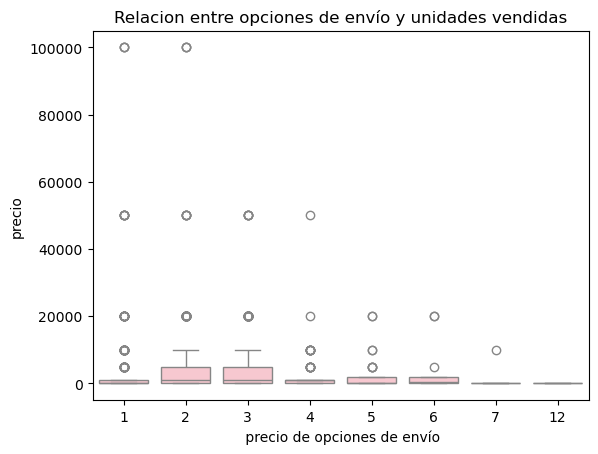

In [58]:
sns.boxplot(x= 'shipping_option_price', y='units_sold', data=df_mer, color= 'pink')
plt.title('Relacion entre opciones de envío y unidades vendidas')
plt.ylabel('precio')
plt.xlabel(' precio de opciones de envío')
plt.show()

Observaciones:
- 

#¿Cuál es la distribución de las calificaciones de los empleados (rating_employee) para los productos que tienen el distintivo "Buena calidad del producto" (badge_product_quality) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes.

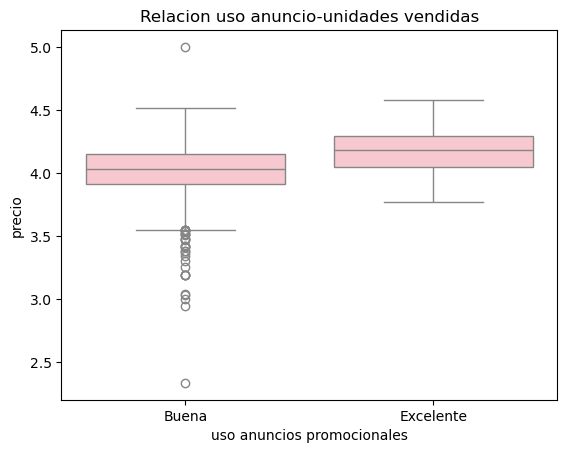

In [59]:
sns.boxplot(x= 'badge_product_quality', y='rating_employee', data=df_mer, color= 'pink')
plt.title('Relacion uso anuncio-unidades vendidas')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

<Axes: xlabel='rating_employee', ylabel='Density'>

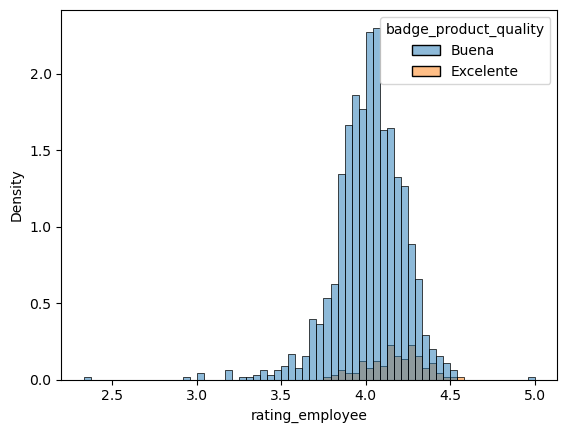

In [60]:
sns.histplot(df_mer, x="rating_employee", hue="badge_product_quality", stat="density")
# Extra: , element="step"

# Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto".

Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product")

In [ ]:
sns.histplot(data = df_mer[df_mer['badge_local_product']='Si'], x="rating_employee", hue="badge_product_quality", stat="density")

In [38]:
df_mer[['badge_local_product', 'badge_product_quality']].value_counts()


badge_local_product  badge_product_quality
Si                   Buena                    1456
                     Excelente                 117
Name: count, dtype: int64